In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# importing dataset

##mi = pd.read_csv("/Users/prathamesh/Desktop/Excelr-material/ML/Myocardial infarction complications.csv")
Data_Set= pd.read_csv("Myocardial infarction complications.csv", encoding='utf-8')
Data_Set.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Dropping Column ID which is not important for our analysis.

Data_Set.drop(["ID"],axis=1,inplace=True)

In [7]:
print(list(Data_Set.columns)) 

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',

In [8]:
Data_Set.shape 

(1700, 123)

In [9]:
Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [10]:
categorical = [var for var in Data_Set.columns if Data_Set[var].dtype=='O'] 
print('There are {} categorical variables\n'.format(len(categorical))) 

There are 0 categorical variables



In [11]:
Data_Set.duplicated().sum()
#There are no duplicate values present in dataset

0

In [12]:
Data_Set.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# EDA (Exploratory Data Analysis)

# Visualizations

Text(0.5, 1.0, 'Null Values Plot')

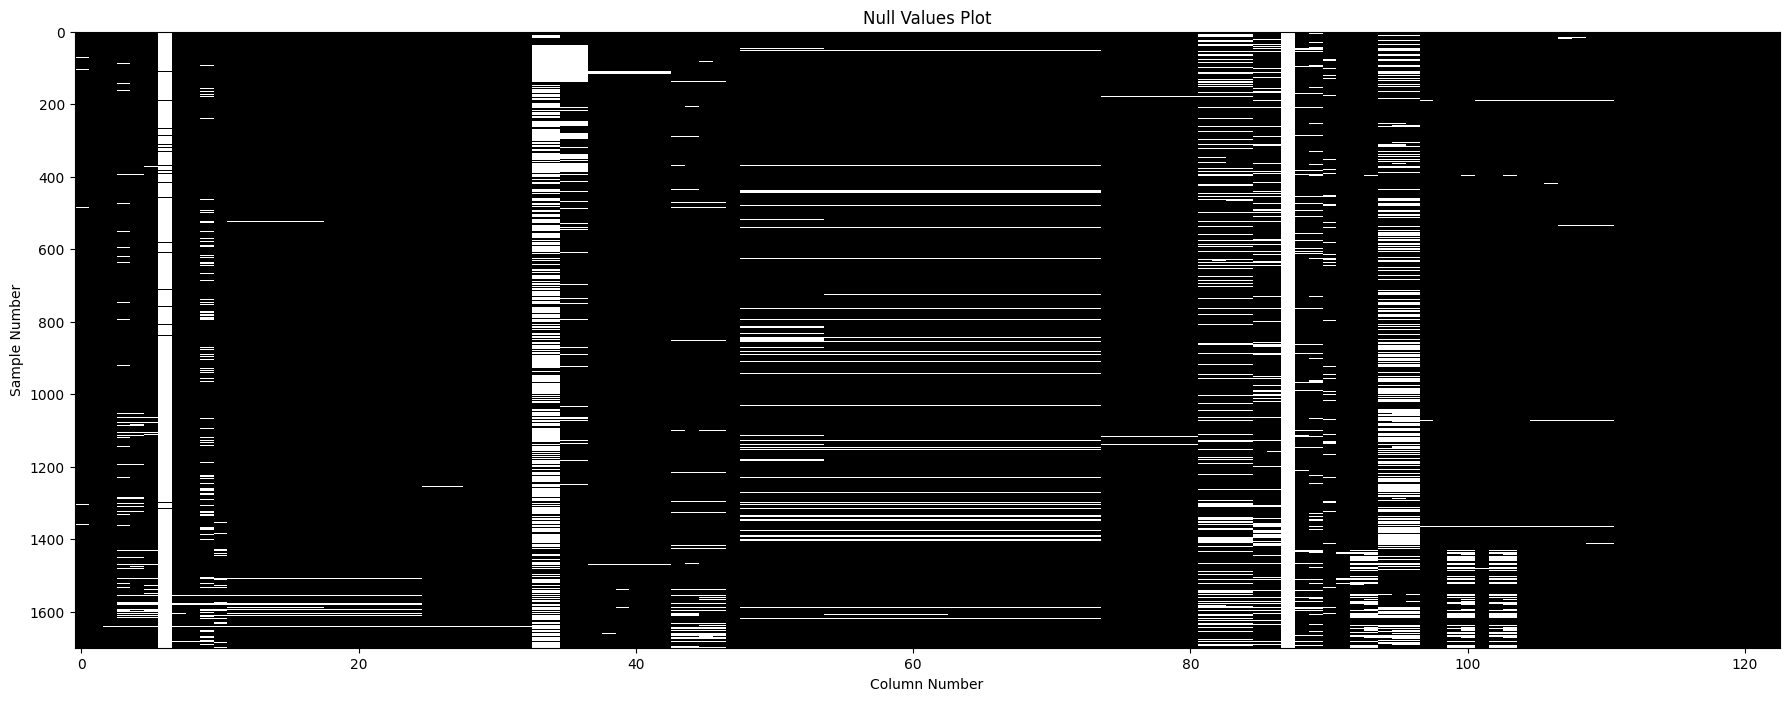

In [13]:
#Data set visualization(Null vs Values)

plt.figure(figsize=(22, 8))
plt.imshow(Data_Set.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title('Null Values Plot') 

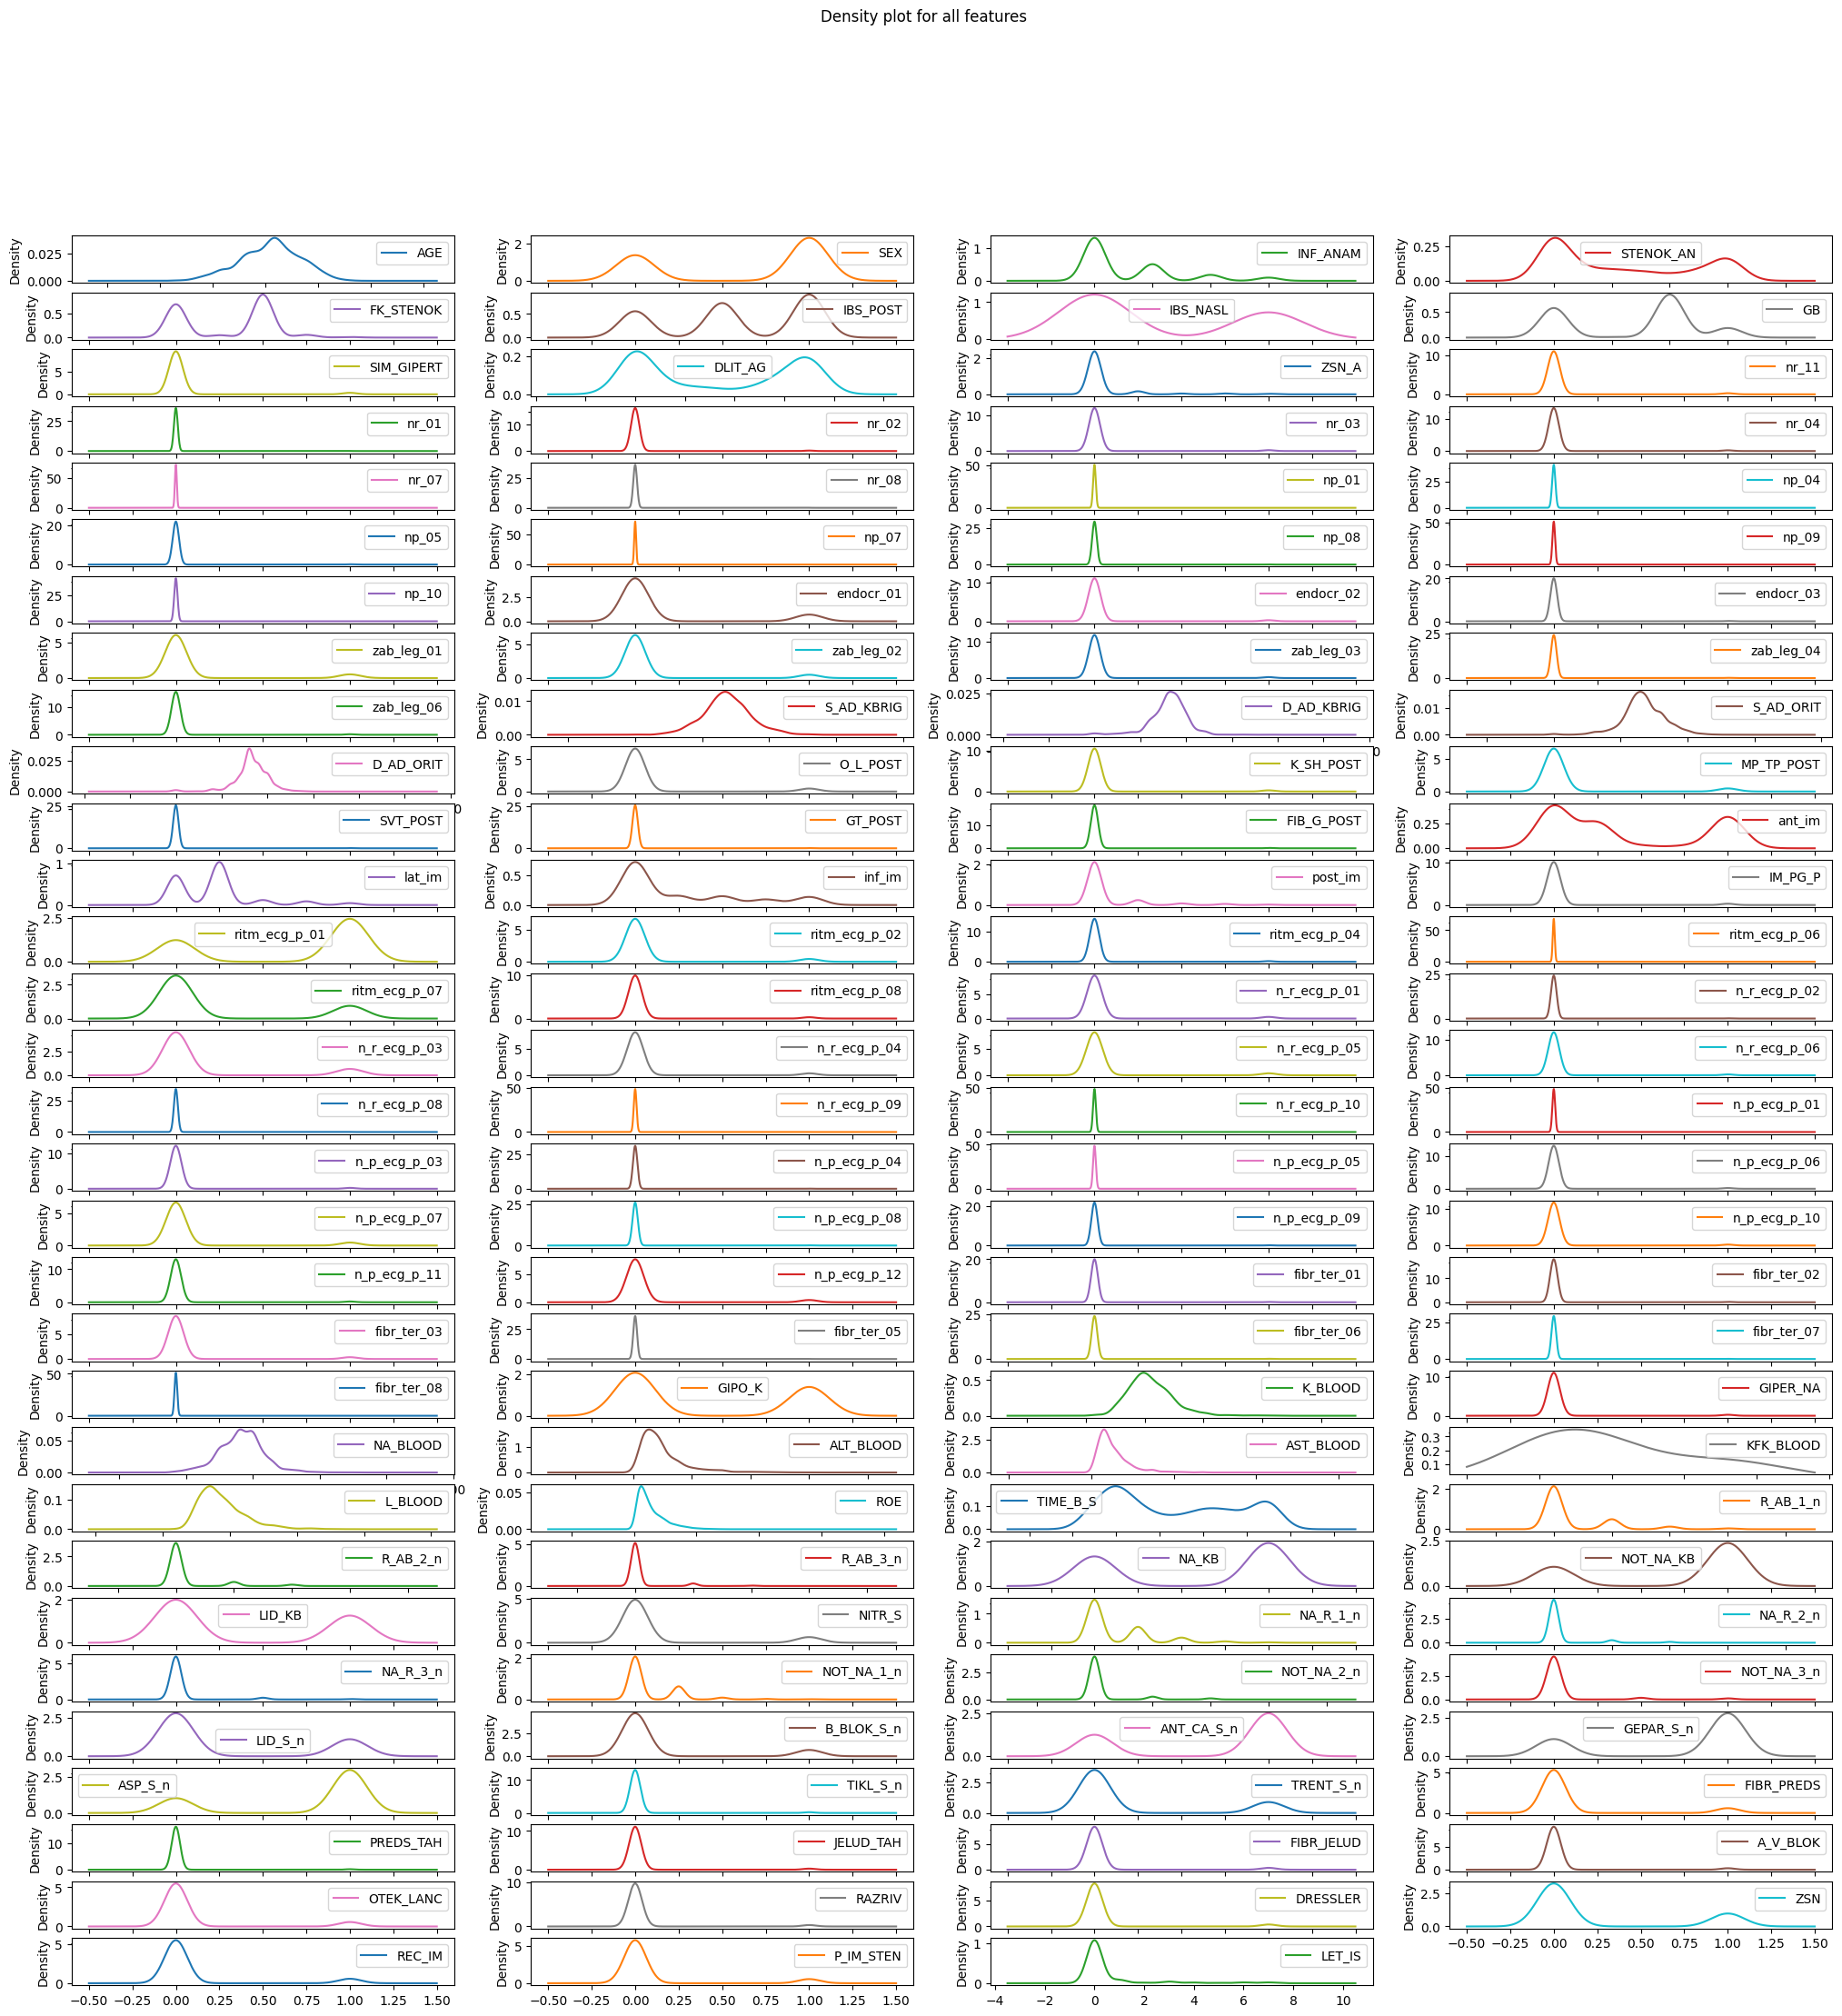

In [14]:
#Density plot for distribution
Data_Set.plot(kind='density',figsize=(25,25),subplots=True,layout=(31,4),title="Density plot for all features",sharex=False)
plt.show()

# 1- Male, 0 -Female
mylabels=["Male","Female"]
Data_Set.SEX.value_counts().plot(kind="pie",labels = mylabels, autopct='%1.0f%%')

<Axes: xlabel='AGE', ylabel='Count'>

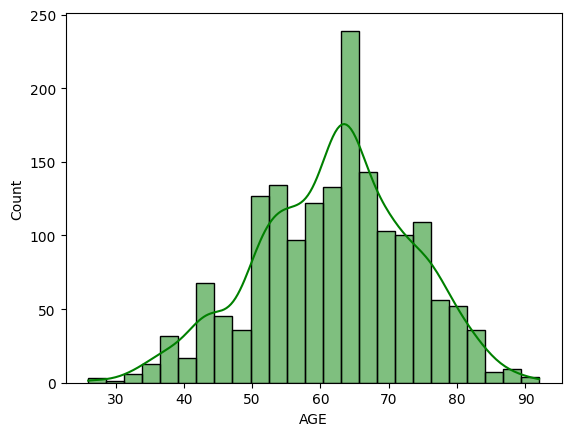

In [15]:
# Adding a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:
sns.histplot(Data_Set['AGE'],kde=True, color='Green')

<Axes: xlabel='LET_IS'>

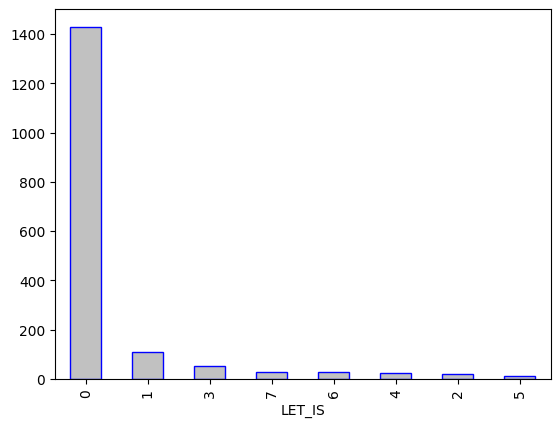

In [16]:
#Barplot for Lethal outcome (cause) (LET_IS)
Data_Set.LET_IS.value_counts().plot(kind='bar',color=(0.4, 0.4, 0.4, 0.4),  edgecolor='blue') 


#0: unknown (alive) 1429 84.06%
#1: cardiogenic shock 110 6.47%
#2: pulmonary edema 18 1.06%
#3: myocardial rupture 54 3.18%
#4: progress of congestive heart failure 23 1.35%
#5: thromboembolism 12 0.71%
#6: asystole 27 1.59%
#7: ventricular fibrillation 27 1.59%

<Axes: title={'center': 'Unique value counts per Variable'}>

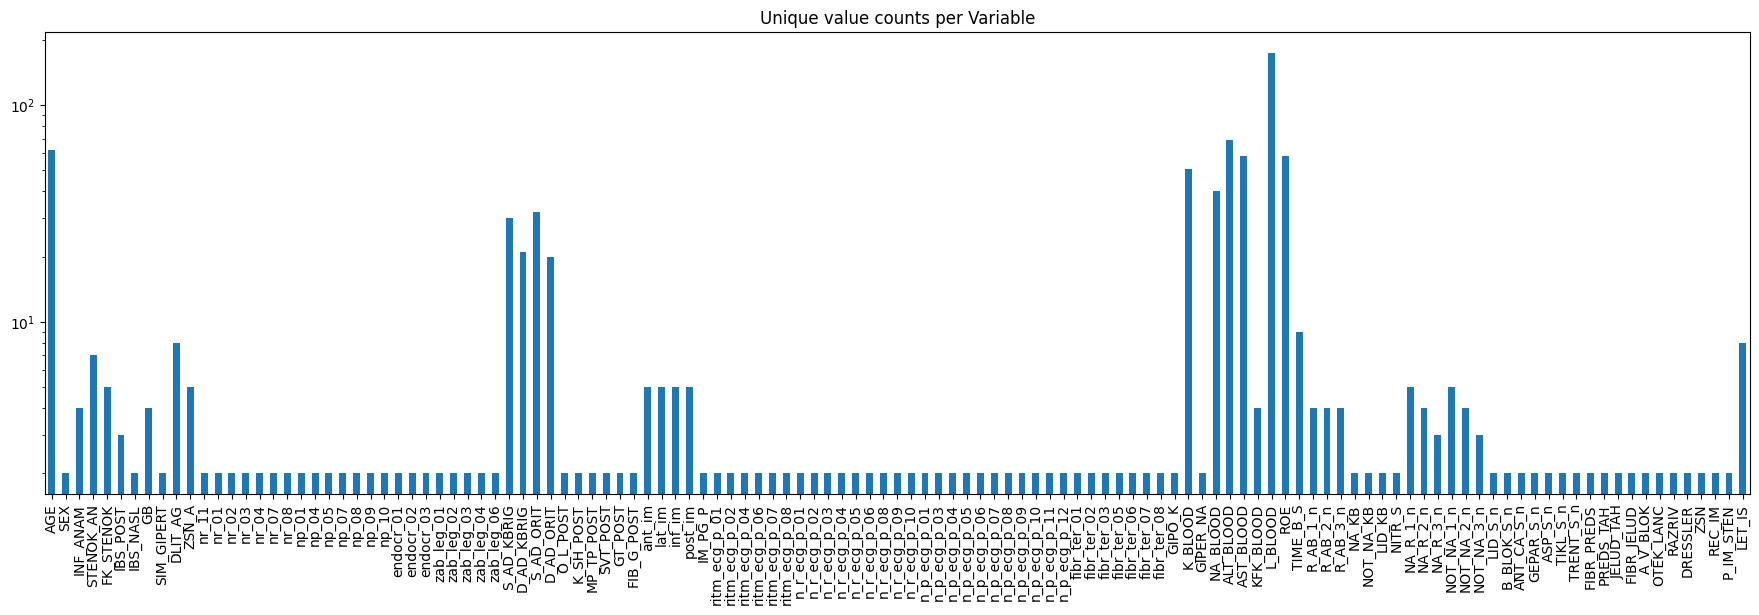

In [17]:
#Variable wise unique value count
unique_values = Data_Set.nunique()
unique_values.plot.bar(logy=True, figsize=(22, 6), title="Unique value counts per Variable")

<Axes: title={'center': 'Null values% per Variable'}>

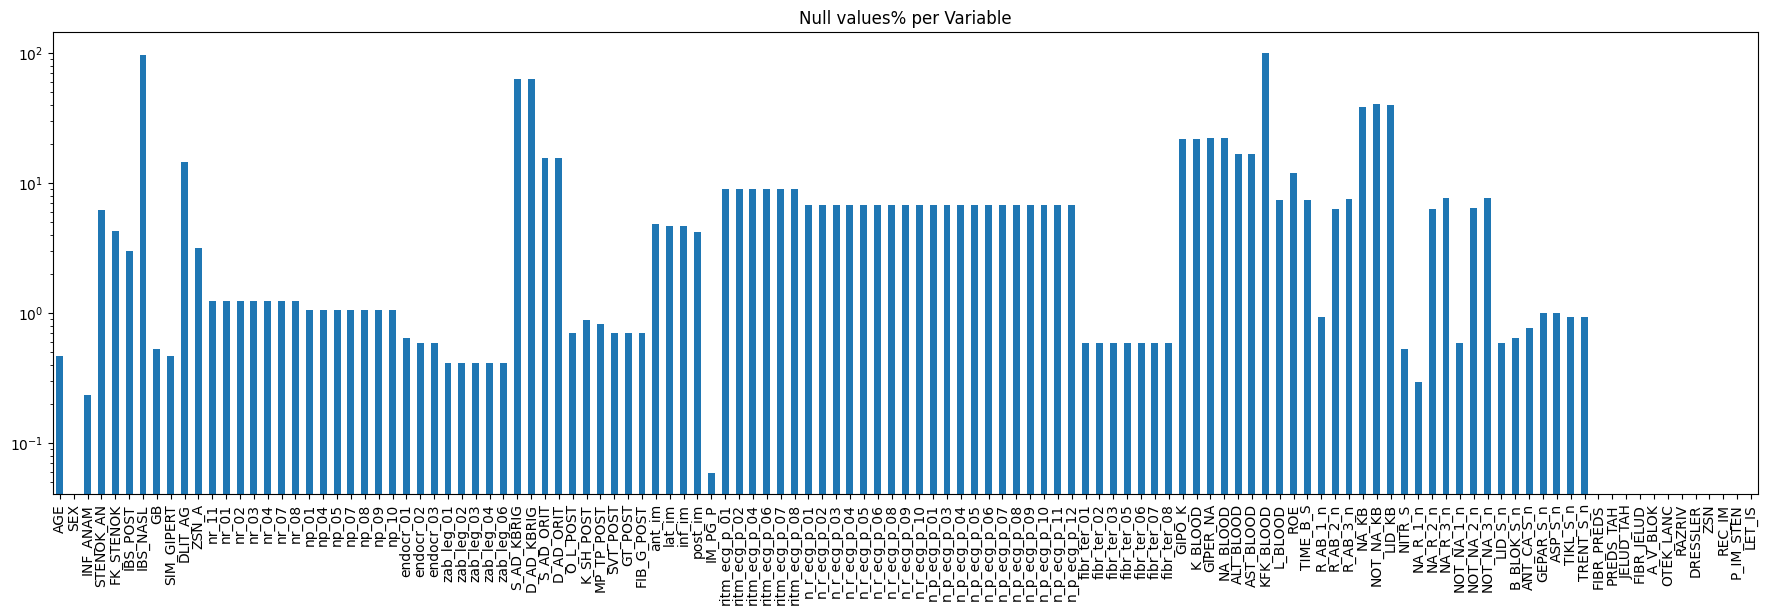

In [18]:
#Bar plot for null_percentage
null_percentage = Data_Set.isnull().sum()/len(Data_Set)
null_percentage
null_percentage1=null_percentage*100 
null_percentage1.plot.bar(logy=True, figsize=(22, 6), title="Null values% per Variable")

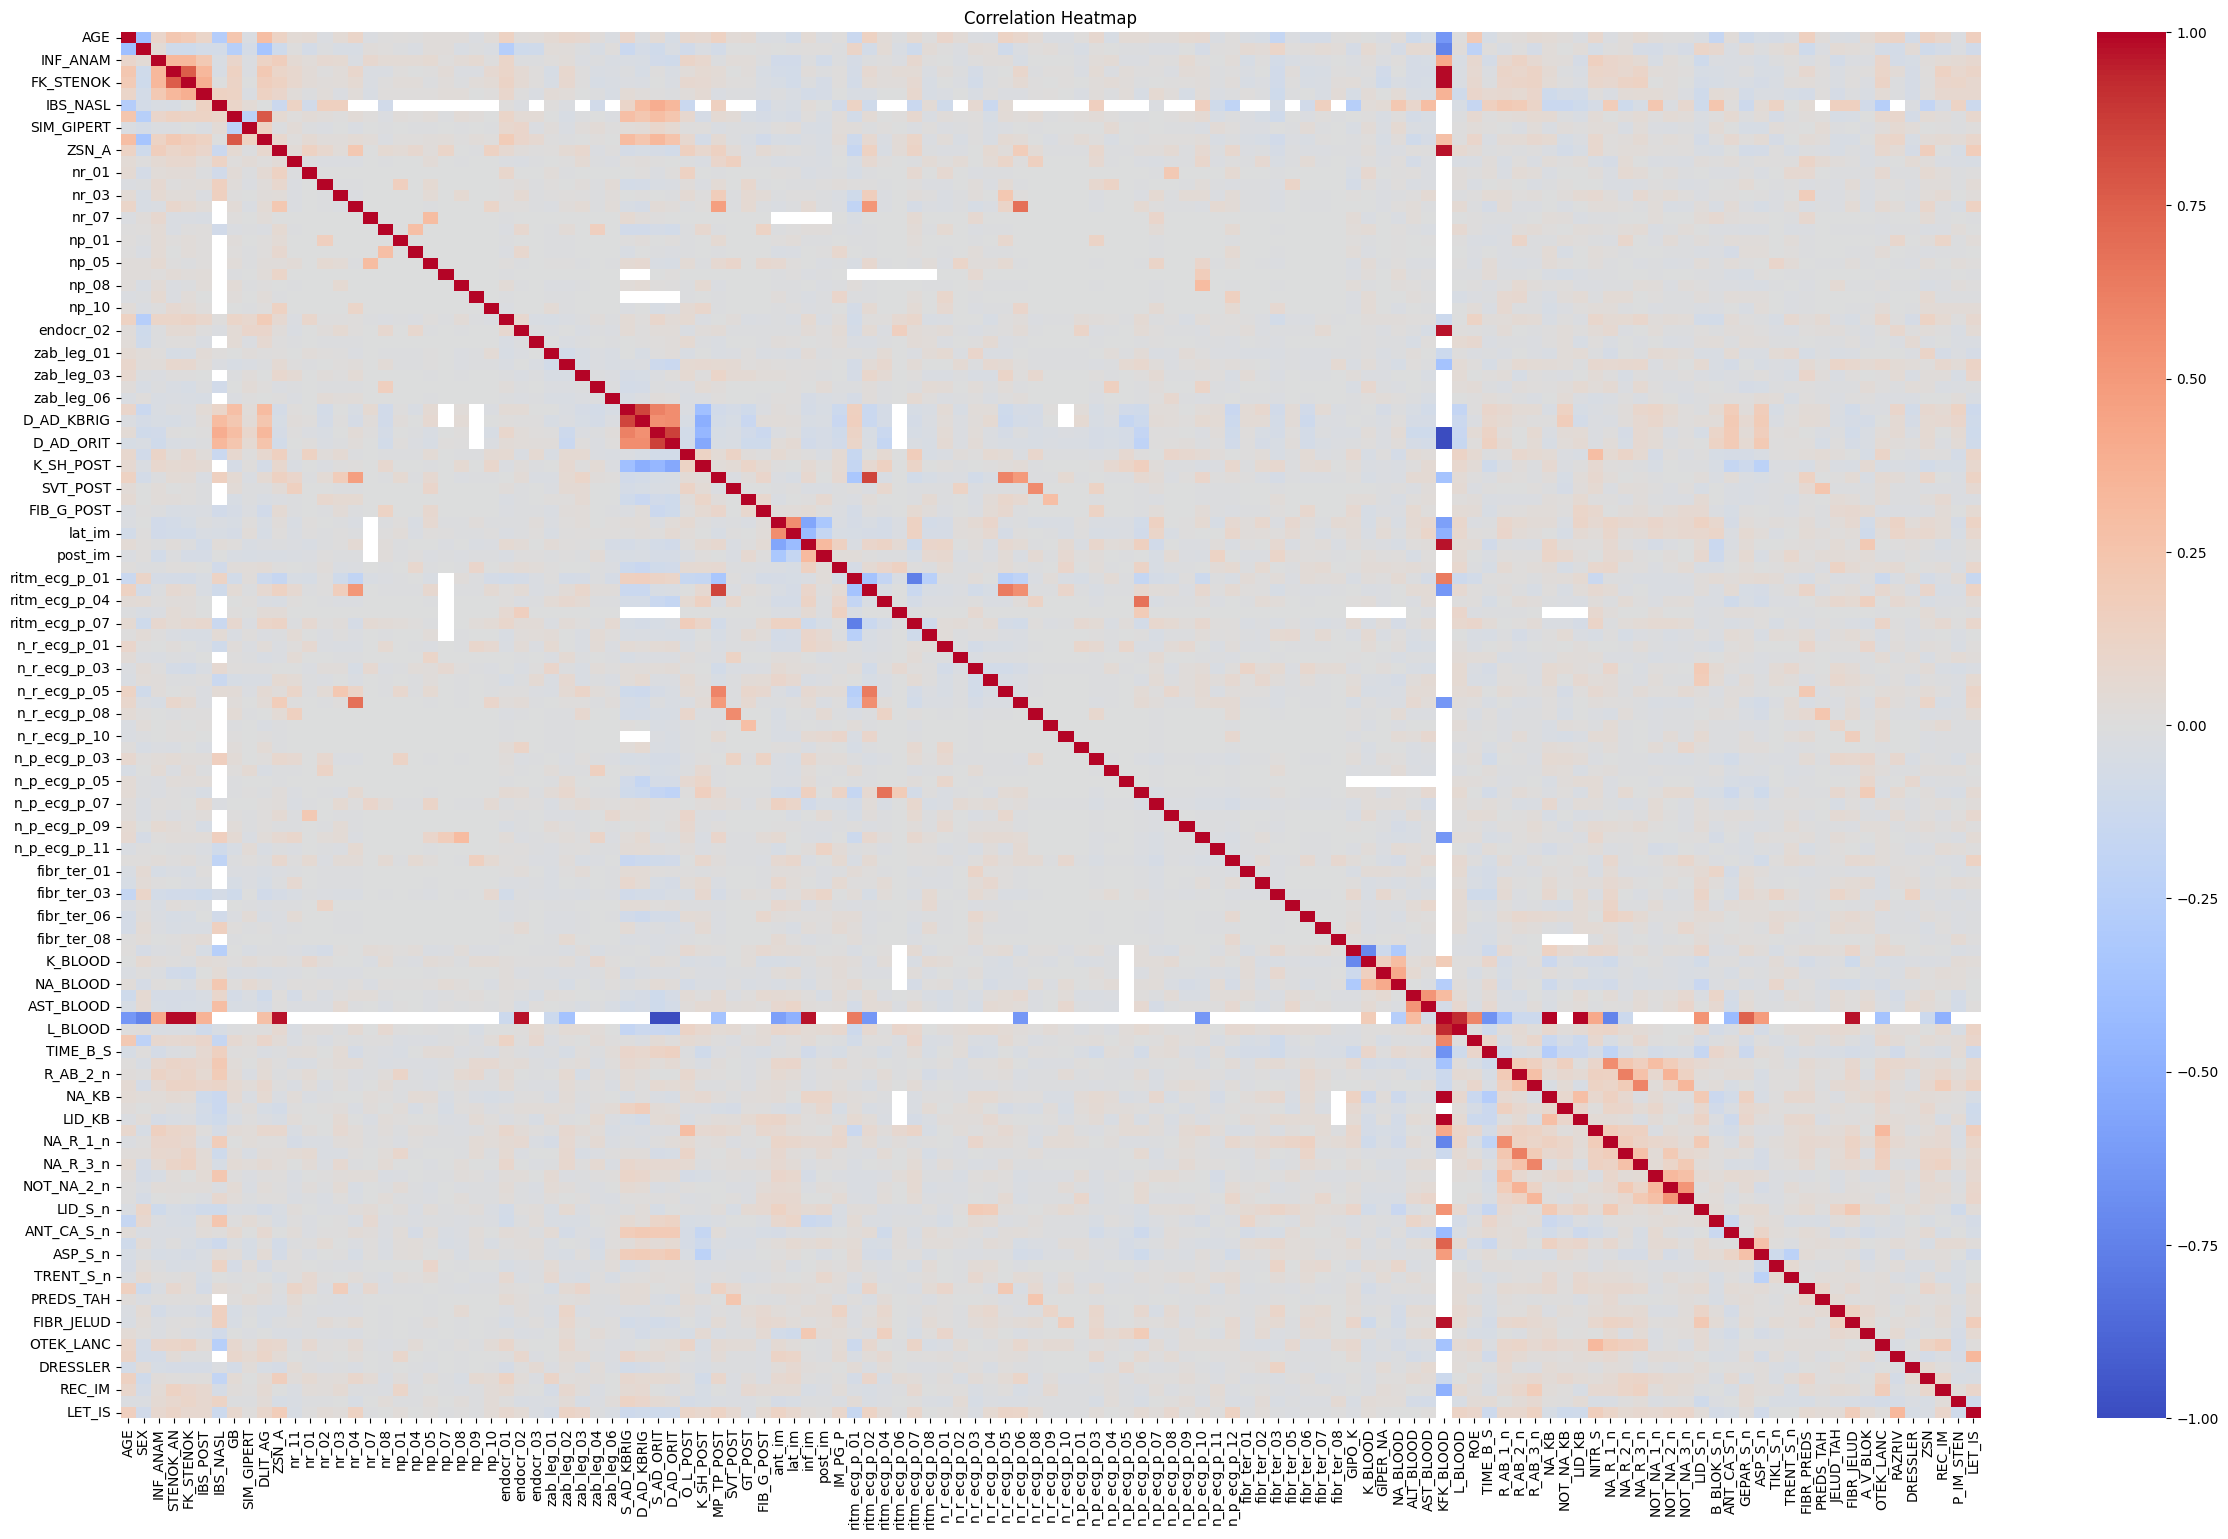

In [19]:
correlation = Data_Set.corr()    #Correlation between Variables

# Heat map to understand correlation visually
plt.figure(figsize=(30, 18))
sns.heatmap(correlation,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

In [20]:
# Count of duplicate values

Data_Set.duplicated().sum()

0

In [21]:
# Datatype of variables

Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [22]:
# Count and percentage of null values present in Variables.

for i in Data_Set.columns:
    if Data_Set[i].isnull().sum() > 0:
        print(i, "-->", Data_Set[i].isnull().sum() , "-->", int(np.round(Data_Set[i].isnull().sum()/len(Data_Set),2)*100),"%")

AGE --> 8 --> 0 %
INF_ANAM --> 4 --> 0 %
STENOK_AN --> 106 --> 6 %
FK_STENOK --> 73 --> 4 %
IBS_POST --> 51 --> 3 %
IBS_NASL --> 1628 --> 96 %
GB --> 9 --> 1 %
SIM_GIPERT --> 8 --> 0 %
DLIT_AG --> 248 --> 15 %
ZSN_A --> 54 --> 3 %
nr_11 --> 21 --> 1 %
nr_01 --> 21 --> 1 %
nr_02 --> 21 --> 1 %
nr_03 --> 21 --> 1 %
nr_04 --> 21 --> 1 %
nr_07 --> 21 --> 1 %
nr_08 --> 21 --> 1 %
np_01 --> 18 --> 1 %
np_04 --> 18 --> 1 %
np_05 --> 18 --> 1 %
np_07 --> 18 --> 1 %
np_08 --> 18 --> 1 %
np_09 --> 18 --> 1 %
np_10 --> 18 --> 1 %
endocr_01 --> 11 --> 1 %
endocr_02 --> 10 --> 1 %
endocr_03 --> 10 --> 1 %
zab_leg_01 --> 7 --> 0 %
zab_leg_02 --> 7 --> 0 %
zab_leg_03 --> 7 --> 0 %
zab_leg_04 --> 7 --> 0 %
zab_leg_06 --> 7 --> 0 %
S_AD_KBRIG --> 1076 --> 63 %
D_AD_KBRIG --> 1076 --> 63 %
S_AD_ORIT --> 267 --> 16 %
D_AD_ORIT --> 267 --> 16 %
O_L_POST --> 12 --> 1 %
K_SH_POST --> 15 --> 1 %
MP_TP_POST --> 14 --> 1 %
SVT_POST --> 12 --> 1 %
GT_POST --> 12 --> 1 %
FIB_G_POST --> 12 --> 1 %
ant_im --> 83 -

In [23]:
# dropping columns with maximum count of null values.

Data_Set_1 = Data_Set.drop(["IBS_NASL","S_AD_KBRIG","D_AD_KBRIG","KFK_BLOOD"],axis=1)

In [24]:
# shape of dataframe before and after dropping columns.

print("Before --> ", Data_Set.shape)
print()
print("After --> ", Data_Set_1.shape)

Before -->  (1700, 123)

After -->  (1700, 119)


In [25]:
Data_Set_1.tail(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1,2.0,NaN,NaN,NaN,2.0,0.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# filling missing values of columns having null count less than 112 with the help of interpolation technique

Data_Set_2 = Data_Set_1.copy(deep=True)
for i in Data_Set_2.columns:
    if Data_Set_2[i].isnull().sum() < 111 and Data_Set_2[i].isnull().sum() > 0:
        Data_Set_2[i] = Data_Set_2[i].interpolate(method = "linear",limit_direction = "forward")

In [27]:
# Count and percentage of null values present in Variables.

for i in Data_Set_2.columns:
    if Data_Set_2[i].isnull().sum() > 0:
        print(i, "-->", Data_Set_2[i].isnull().sum() , "-->", int(np.round(Data_Set_2[i].isnull().sum()/len(Data_Set_2),2)*100),"%")

DLIT_AG --> 248 --> 15 %
S_AD_ORIT --> 267 --> 16 %
D_AD_ORIT --> 267 --> 16 %
ritm_ecg_p_01 --> 152 --> 9 %
ritm_ecg_p_02 --> 152 --> 9 %
ritm_ecg_p_04 --> 152 --> 9 %
ritm_ecg_p_06 --> 152 --> 9 %
ritm_ecg_p_07 --> 152 --> 9 %
ritm_ecg_p_08 --> 152 --> 9 %
n_r_ecg_p_01 --> 115 --> 7 %
n_r_ecg_p_02 --> 115 --> 7 %
n_r_ecg_p_03 --> 115 --> 7 %
n_r_ecg_p_04 --> 115 --> 7 %
n_r_ecg_p_05 --> 115 --> 7 %
n_r_ecg_p_06 --> 115 --> 7 %
n_r_ecg_p_08 --> 115 --> 7 %
n_r_ecg_p_09 --> 115 --> 7 %
n_r_ecg_p_10 --> 115 --> 7 %
n_p_ecg_p_01 --> 115 --> 7 %
n_p_ecg_p_03 --> 115 --> 7 %
n_p_ecg_p_04 --> 115 --> 7 %
n_p_ecg_p_05 --> 115 --> 7 %
n_p_ecg_p_06 --> 115 --> 7 %
n_p_ecg_p_07 --> 115 --> 7 %
n_p_ecg_p_08 --> 115 --> 7 %
n_p_ecg_p_09 --> 115 --> 7 %
n_p_ecg_p_10 --> 115 --> 7 %
n_p_ecg_p_11 --> 115 --> 7 %
n_p_ecg_p_12 --> 115 --> 7 %
GIPO_K --> 369 --> 22 %
K_BLOOD --> 371 --> 22 %
GIPER_NA --> 375 --> 22 %
NA_BLOOD --> 375 --> 22 %
ALT_BLOOD --> 284 --> 17 %
AST_BLOOD --> 285 --> 17 %
L_BLOO

In [28]:
Data_Set_2.tail(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,2.0,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1,2.0,2.0,2.0,1.0,2.0,0.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# filling missing values of remaining columns with the help of fillna() function and median central tendency

Data_Set_3 = Data_Set_2.copy(deep=True)
for i in Data_Set_3.columns:
    if Data_Set_3[i].isnull().sum() > 0:
        Data_Set_3[i] = Data_Set_3[i].fillna(Data_Set_3[i].median())

In [30]:
# Count and percentage of null values present in Variables.

for i in Data_Set_3.columns:
    if Data_Set_3[i].isnull().sum() > 0:
        print(i, "-->", Data_Set_3[i].isnull().sum() , "-->", int(np.round(Data_Set_3[i].isnull().sum()/len(mi3),2)*100),"%")

In [31]:
Data_Set_3.tail(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,2.0,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1,2.0,2.0,2.0,1.0,2.0,0.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Null Values Plot')

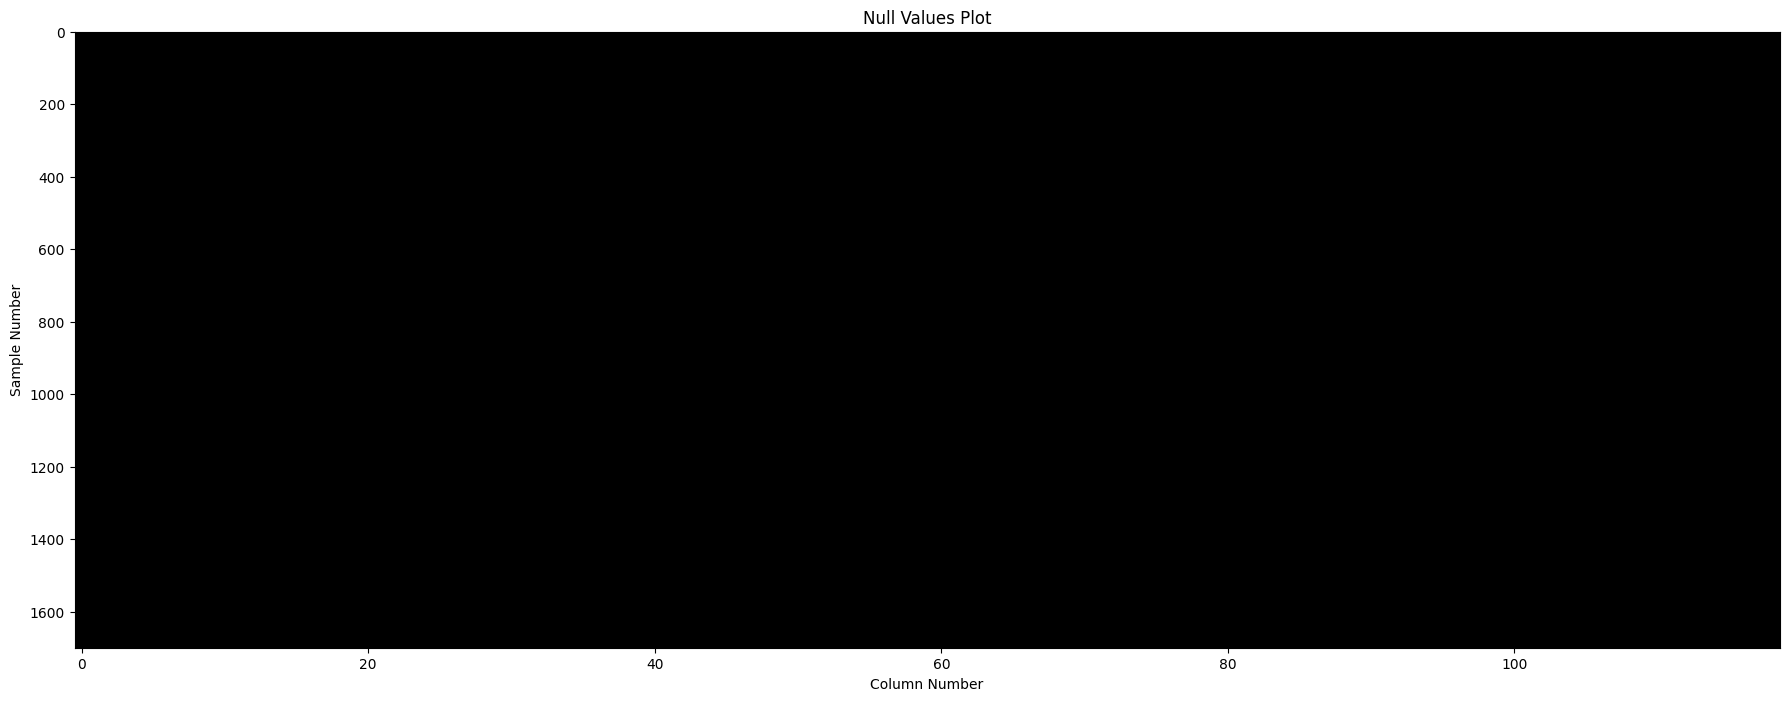

In [32]:
#Data set visualization(Null vs Values)

plt.figure(figsize=(22, 8))
plt.imshow(Data_Set_3.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title('Null Values Plot') 

### Feature Selection

### Splitting dataset



In [33]:
x = Data_Set_3.iloc[:,:-1]
y = Data_Set_3.iloc[:,-1]

In [34]:
x.head(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: LET_IS, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score, KFold

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [37]:
# Feature selection and model evaluation
test_scores = []

for i in range(1, x.shape[1] + 1):
    # Feature selection
    selected_features = SelectKBest(score_func=chi2, k=i).fit(x, y)
    X_selected = selected_features.transform(x)
    
    # Standardize features
    X_standardized = StandardScaler().fit_transform(X_selected)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.25, random_state=42)
    
    # Train an XGBoost classifier
    model = XGBClassifier()
    model.fit(X_train, y_train)
    
    # Evaluate and store test score
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_scores.append(accuracy)
    
    print(f"Test score for model with {i} columns: {accuracy * 100:.2f}%")

Test score for model with 1 columns: 87.29%
Test score for model with 2 columns: 88.94%
Test score for model with 3 columns: 89.41%
Test score for model with 4 columns: 90.59%
Test score for model with 5 columns: 90.35%
Test score for model with 6 columns: 87.76%
Test score for model with 7 columns: 88.24%
Test score for model with 8 columns: 88.71%
Test score for model with 9 columns: 88.47%
Test score for model with 10 columns: 88.47%
Test score for model with 11 columns: 88.71%
Test score for model with 12 columns: 88.94%
Test score for model with 13 columns: 89.41%
Test score for model with 14 columns: 89.65%
Test score for model with 15 columns: 89.88%
Test score for model with 16 columns: 91.06%
Test score for model with 17 columns: 90.82%
Test score for model with 18 columns: 91.06%
Test score for model with 19 columns: 90.82%
Test score for model with 20 columns: 90.59%
Test score for model with 21 columns: 91.06%
Test score for model with 22 columns: 91.06%
Test score for mode

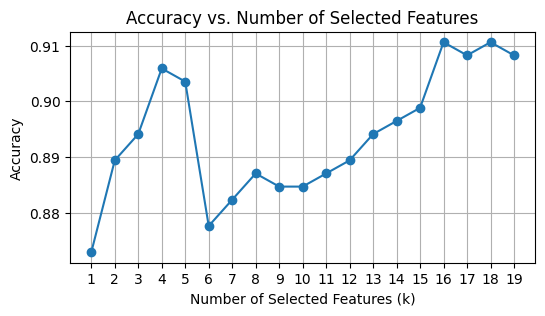

In [38]:
plt.figure(figsize=(6, 3))
plt.plot(range(1, 20), test_scores[:19], marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Selected Features')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [39]:
k = 16  # Number of features to select
chi2_selector = SelectKBest(chi2, k=k)
X_kbest = chi2_selector.fit_transform(x, y)

# Get the indices of the selected features
selected_feature_indices = chi2_selector.get_support(indices=True)
selected_chi2_scores = chi2_selector.scores_[selected_feature_indices]

feature_names = Data_Set_3.columns

# Print the names and scores of selected features
print("Selected features with chi-square scores:")
for i, feature_idx in enumerate(selected_feature_indices):
    print(f"{feature_names[feature_idx]}: {selected_chi2_scores[i]}")

Selected features with chi-square scores:
AGE: 176.37023874329168
STENOK_AN: 135.86558170270303
ZSN_A: 322.8507864514384
S_AD_ORIT: 1390.383824872405
D_AD_ORIT: 953.3575089826006
K_SH_POST: 516.821017778155
ant_im: 104.99484391964708
ROE: 187.77819664110916
TIME_B_S: 81.7595520681001
R_AB_2_n: 78.75602480608524
R_AB_3_n: 87.47624939739278
NITR_S: 93.95130153286416
NA_R_2_n: 78.74174945688307
FIBR_JELUD: 130.65135775174065
RAZRIV: 1646.0000000000023
ZSN: 80.19350995929015


In [40]:
# maximum score obtained

max(test_scores)

0.92

#### ** From SelectKBest technique we can conclude that model with only top 16 best columns is giving maximum accuracy.

In [41]:
index = selected_feature_indices

topk_mi = x[x.columns[index]]
topk_mi = pd.concat([topk_mi,y],axis=1)
topk_mi

,AGE,STENOK_AN,ZSN_A,S_AD_ORIT,D_AD_ORIT,K_SH_POST,ant_im,ROE,TIME_B_S,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_2_n,FIBR_JELUD,RAZRIV,ZSN,LET_IS
0,77.0,1.0,0.0,180.0,100.0,0.0,1.0,16.0,4.0,0.0,1.0,0.0,0.0,0,0,0,0
1,55.0,0.0,0.0,120.0,90.0,0.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0,0,0,0
2,52.0,0.0,0.0,180.0,100.0,0.0,4.0,10.0,3.0,0.0,0.0,0.0,0.0,0,0,0,0
3,68.0,0.0,1.0,120.0,70.0,0.0,0.0,10.0,2.0,0.0,1.0,0.0,0.0,0,0,1,0
4,60.0,0.0,0.0,160.0,90.0,0.0,4.0,10.0,9.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,4.0,0.0,110.0,70.0,0.0,2.0,6.0,2.0,0.0,0.0,0.0,0.0,0,1,0,3
1696,70.0,6.0,0.0,50.0,0.0,1.0,0.0,10.0,2.0,0.0,0.0,0.0,0.0,0,0,0,1
1697,55.0,6.0,0.0,70.0,50.0,0.5,4.0,13.0,1.0,0.0,0.0,1.0,0.0,0,0,0,6
1698,79.0,2.0,2.0,110.0,70.0,0.0,2.0,4.0,2.0,0.0,0.0,1.0,0.0,0,0,0,1


In [42]:
topk_mi.describe()

,AGE,STENOK_AN,ZSN_A,S_AD_ORIT,D_AD_ORIT,K_SH_POST,ant_im,ROE,TIME_B_S,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_2_n,FIBR_JELUD,RAZRIV,ZSN,LET_IS
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.869412,2.341765,0.208529,133.867647,82.317647,0.027353,1.585294,13.033529,4.633529,0.157647,0.071765,0.115294,0.110294,0.041765,0.031765,0.231765,0.477059
std,11.263394,2.406999,0.675320,28.828359,16.849723,0.162706,1.692453,10.658736,2.768345,0.445720,0.302282,0.319010,0.384250,0.200110,0.175425,0.422084,1.381818
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,120.000000,80.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,2.000000,0.000000,130.000000,80.000000,0.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,5.000000,0.000000,150.000000,90.000000,0.000000,4.000000,17.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,6.000000,4.000000,260.000000,190.000000,1.000000,4.000000,140.000000,9.000000,3.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,7.000000


### Data Visualization

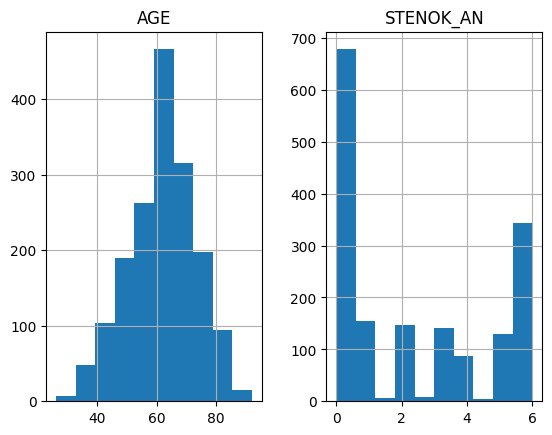

In [43]:
topk_mi.iloc[:,:2].hist()
plt.show()

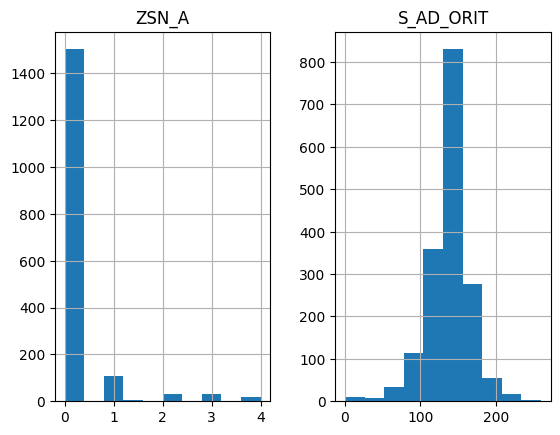

In [44]:
topk_mi.iloc[:,2:4].hist()
plt.show()

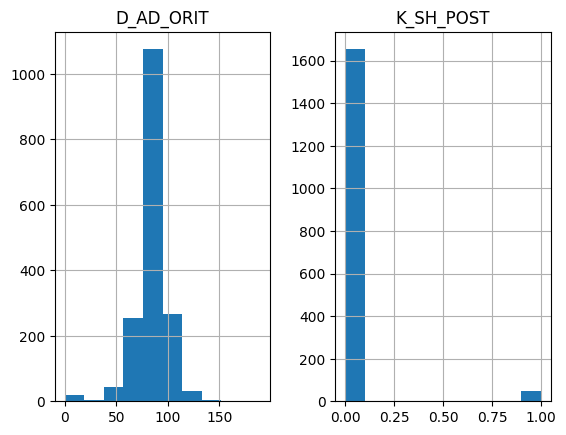

In [45]:
topk_mi.iloc[:,4:6].hist()
plt.show()

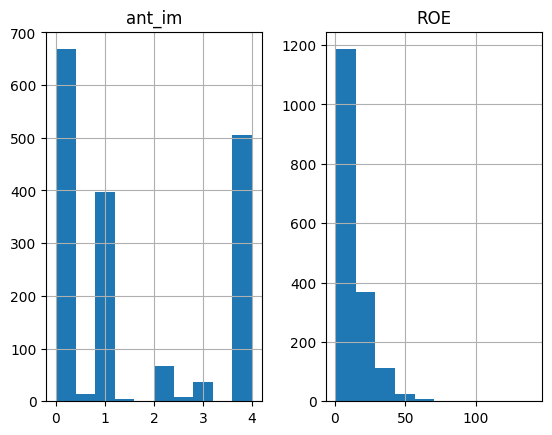

In [46]:
topk_mi.iloc[:,6:8].hist()
plt.show()

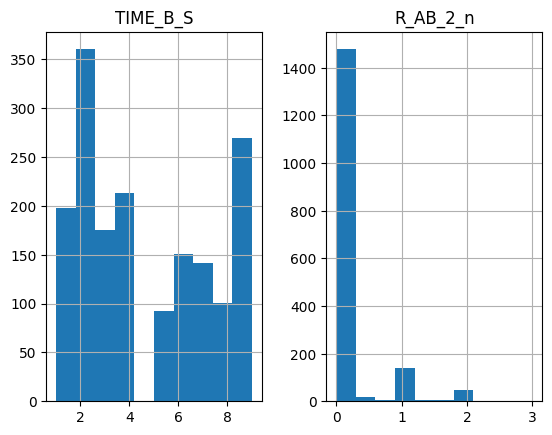

In [47]:
topk_mi.iloc[:,8:10].hist()
plt.show()

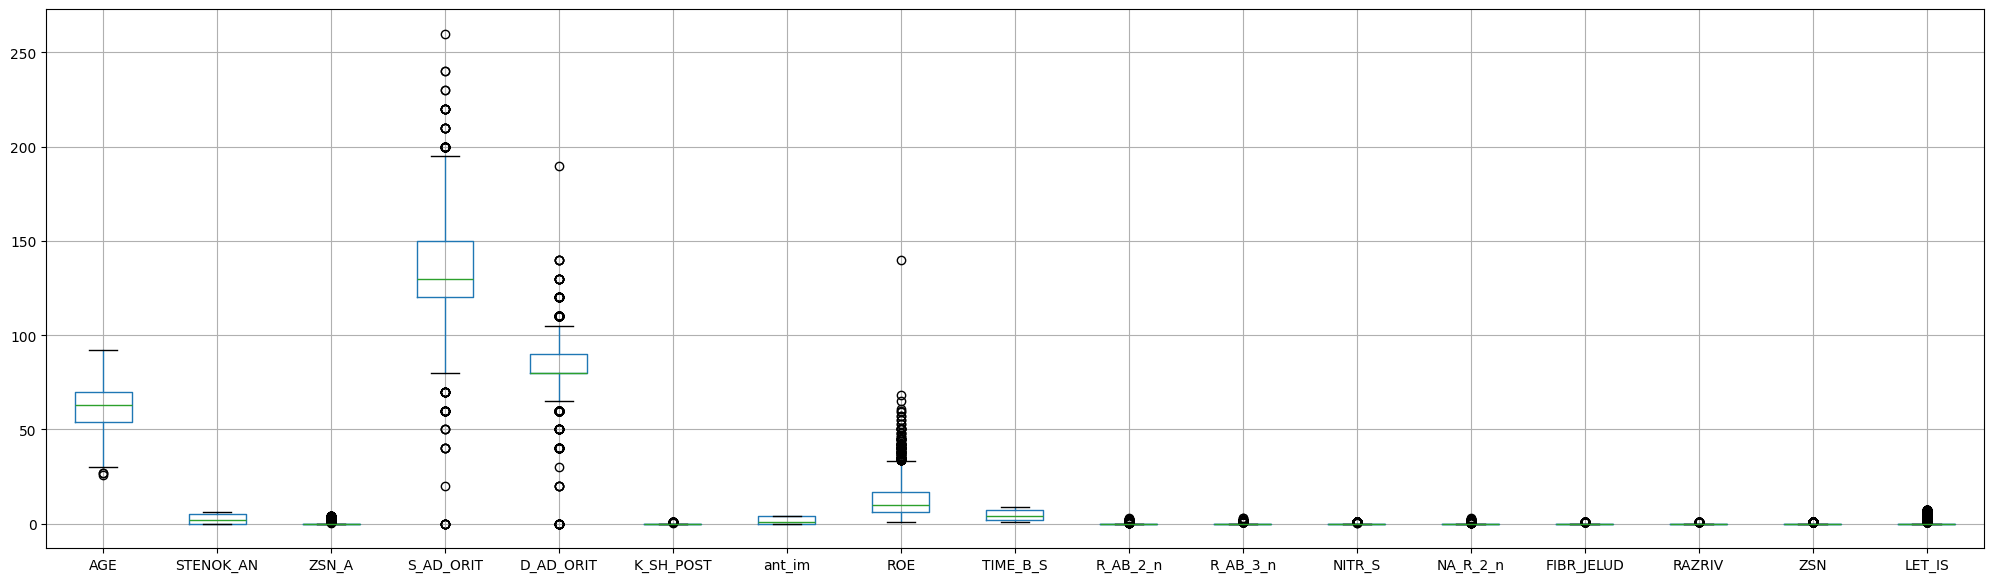

In [48]:
# checking for outliers

plt.figure(figsize=(25,7))
topk_mi.boxplot()
plt.show()

In [49]:
# significant amount of outliers are present in dataset. Therefore removal of outlier can cause loss of information.

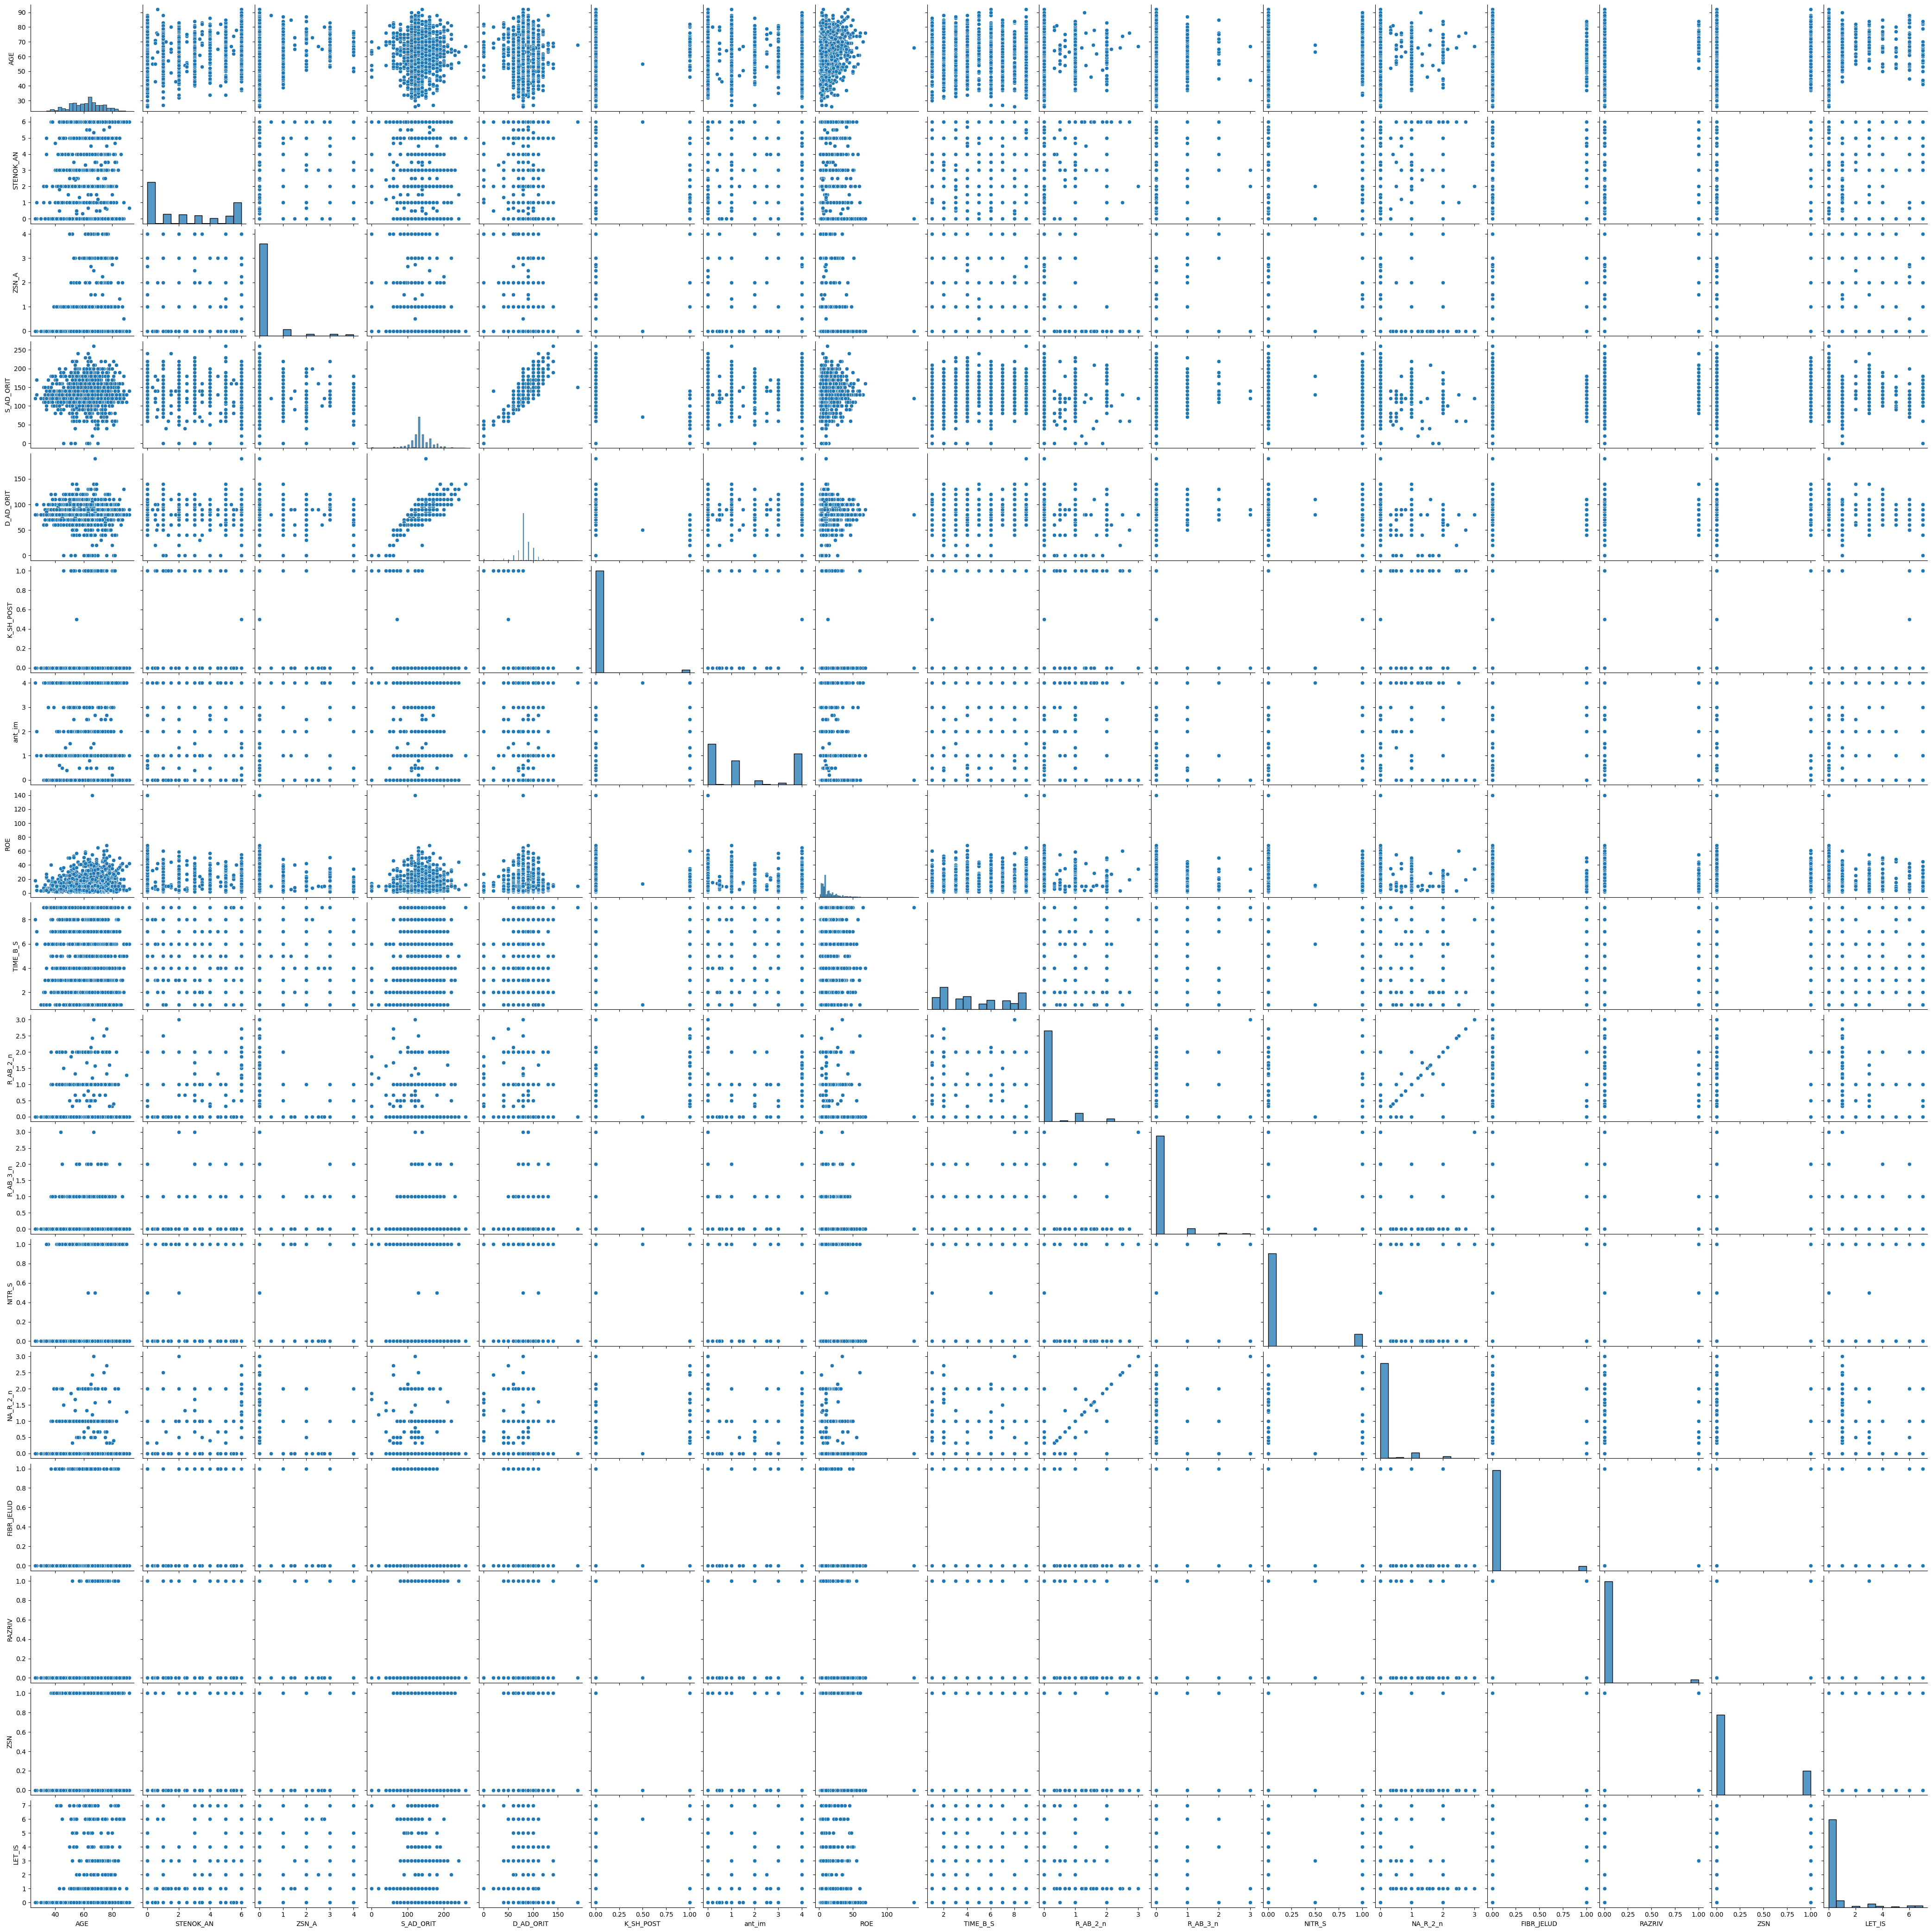

In [50]:
sns.pairplot(topk_mi)
plt.show()

#### ** From above every data visualization we can conclude that dataset is highly imbalanced. Which we can cure by applying SMOTE.

# Model Building and Evaluation

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
from sklearn.utils import class_weight

from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [54]:
# splitting of dataset

x = topk_mi.iloc[:,:-1]
y = topk_mi.iloc[:,-1:]




x = StandardScaler().fit_transform(x)

In [55]:
models = {
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "Linear SVM": LinearSVC()
}

# Model evaluation
results = []

for model_name, model in models.items():
    # Create KFold cross-validation iterator
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    accuracy_scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

    # Average accuracy scores
    average_accuracy = accuracy_scores.mean()*100

    # Store results
    results.append({"Model": model_name, "Accuracy": f"{average_accuracy:.2f}%"})

# Create DataFrame from results
results_df = pd.DataFrame(results)

print(results_df)

                 Model Accuracy
0              XGBoost   89.35%
1        Random Forest   89.71%
2        Decision Tree   82.06%
3  Logistic Regression   89.35%
4     Ridge Classifier   89.47%
5           KNeighbors   88.76%
6    Gradient Boosting   89.06%
7             AdaBoost   77.29%
8                  SVM   89.18%
9           Linear SVM   89.59%


In [56]:

# Filter the DataFrame to find the row corresponding to the top accuracy model
top_model = results_df.loc[results_df['Accuracy'].idxmax()]

print("Top performing model:")
print(top_model)

Top performing model:
Model       Random Forest
Accuracy           89.71%
Name: 1, dtype: object


In [58]:
import pickle


model = XGBClassifier()
model.fit(x,y)

with open('Lethal_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [57]:
import joblib
joblib.dump(model,"Lethal_model.pkl")

['Lethal_model.pkl']

In [59]:
# Assuming you have a trained model saved in 'old_model.pkl'
import xgboost as xgb

import joblib

# Load the model using joblib
loaded_model = joblib.load('Lethal_model.pkl')


In [ ]:
# import xgboost as xgb

# # Load the exported model
# loaded_model = xgb.Booster(model_file='exported_model.json')

In [ ]:
pip install --upgrade xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\91879\\AppData\\Roaming\\Python\\Python310\\site-packages\\~gboost\\lib\\xgboost.dll'
Check the permissions.



In [ ]:
# import pickle

# # Find the top performing model
# top_model = results_df.iloc[results_df['Accuracy'].idxmax()]["Model"]

# # Ask the user whether to retrain
# train_again = input("Do you want to retrain the top model (y/n)? ")

# if train_again.lower() == 'y':
#     train_again = True
# else:
#     train_again = False

# # Train the top performing model on the full dataset (optional)
# top_model_instance = models[top_model]
# if train_again:
#     top_model_instance.fit(x, y)

# # Save the top performing model using pickle
# with open('Lethal_model.pkl', 'wb') as f:
#     pickle.dump(top_model_instance, f)

In [ ]:
# # Assuming model is your XGBoost model
# model.save_model('Lethal_model.json')


# # Assuming model is your XGBoost model
# model = xgb.Booster(model_file='Lethal_model.json')

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x_stand,y_smt,test_size=0.3,random_state=42)

In [ ]:
# from xgboost import XGBClassifier

In [ ]:
# xgboost_model = XGBClassifier()
# xgboost_model.fit(x_train,y_train)
# y_pred = xgboost_model.predict(x_test)

# print("XGBOOST")
# print('-------------------------------------------------------')
# print()

# print("Scores")
# print('-------------------------------------------------------')
# print("test score " , xgboost_model.score(x_test, y_test))
# print("train score " , xgboost_model.score(x_train, y_train))
# print()
# if abs((xgboost_model.score(x_train, y_train))-(xgboost_model.score(x_test, y_test))) > 15:
#     print("Overfiting or underfitting exist")
# else:
#     print("Overfiting or underfitting doesn't exist")


# print()
# print('Confusion matrix')
# print('-------------------------------------------------------')
# print(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred))
# plt.show()

# print()
# print('Classification Report')
# print('-------------------------------------------------------')
# print(classification_report(y_test, y_pred))

# 

In [ ]:
# knn_model = KNeighborsClassifier()
# knn_model.fit(x_train,y_train)
# y_pred = knn_model.predict(x_test)

# print("KNN")
# print('-------------------------------------------------------')
# print()

# print("Scores")
# print('-------------------------------------------------------')
# print("test score " , knn_model.score(x_test, y_test))
# # print("train score " , knn_model.score(x_train, y_train))
# print()
# if abs((knn_model.score(x_train, y_train))-(knn_model.score(x_test, y_test))) > 15:
#     print("Overfiting or underfitting exist")
# else:
#     print("Overfiting or underfitting doesn't exist")

# print()

# print('Confusion matrix')
# print('-------------------------------------------------------')
# print(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred))
# plt.show()

# print()
# print('Classification Report')
# print('-------------------------------------------------------')
# print(classification_report(y_test, y_pred))

# 

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# LR_model = LogisticRegression()
# LR_model.fit(x_train,y_train)
# y_pred = LR_model.predict(x_test)

# print("Logistic Regression")
# print('-------------------------------------------------------')
# print()

# print("Scores")
# print('-------------------------------------------------------')
# print("test score " , LR_model.score(x_test, y_test))
# print("train score " , LR_model.score(x_train, y_train))
# print()
# if abs((LR_model.score(x_train, y_train))-(LR_model.score(x_test, y_test))) > 15:
#     print("Overfiting or underfitting exist")
# else:
#     print("Overfiting or underfitting doesn't exist")

# print()

# print('Confusion matrix')
# print('-------------------------------------------------------')
# print(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred))
# plt.show()

# print()
# print('Classification Report')
# print('-------------------------------------------------------')
# print(classification_report(y_test, y_pred))

# 

In [ ]:
# from sklearn.svm import SVC

In [ ]:
# svm_model = SVC()
# svm_model.fit(x_train, y_train)
# y_pred = svm_model.predict(x_test)

# print("Support Vector Machine")
# print('-------------------------------------------------------')
# print()

# print("Scores")
# print('-------------------------------------------------------')
# print("test score " , svm_model.score(x_test, y_test))
# print("train score " , svm_model.score(x_train, y_train))
# print()
# if abs((svm_model.score(x_train, y_train))-(svm_model.score(x_test, y_test))) > 15:
#     print("Overfiting or underfitting exist")
# else:
#     print("Overfiting or underfitting doesn't exist")

# print()

# print('Confusion matrix')
# print('-------------------------------------------------------')
# print(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred))
# plt.show()

# print()
# print('Classification Report')
# print('-------------------------------------------------------')
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
# rf_model = RandomForestClassifier()
# rf_model.fit(x_train, y_train)
# y_pred = rf_model.predict(x_test)

# print("Random Forest Classifier")
# print('-------------------------------------------------------')
# print()

# print("Scores")
# print('-------------------------------------------------------')
# print("test score " , rf_model.score(x_test, y_test))
# print("train score " , rf_model.score(x_train, y_train))
# print()
# if abs((rf_model.score(x_train, y_train))-(rf_model.score(x_test, y_test))) > 15:
#     print("Overfiting or underfitting exist")
# else:
#     print("Overfiting or underfitting doesn't exist")

# print()

# print('Confusion matrix')
# print('-------------------------------------------------------')
# print(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred))
# plt.show()

# print()
# print('Classification Report')
# print('-------------------------------------------------------')
# print(classification_report(y_test, y_pred))

# 

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
# decisiontree_model = DecisionTreeClassifier(criterion="gini")
# decisiontree_model.fit(x_train,y_train)
# y_pred = decisiontree_model.predict(x_test)

# print("Decision Tree")
# print('-------------------------------------------------------')
# print()

# print("Scores")
# print('-------------------------------------------------------')
# print("test score " , decisiontree_model.score(x_test, y_test))
# print("train score " , decisiontree_model.score(x_train, y_train))
# print()
# if abs((decisiontree_model.score(x_train, y_train))-(decisiontree_model.score(x_test, y_test))) > 15:
#     print("Overfiting or underfitting exist")
# else:
#     print("Overfiting or underfitting doesn't exist")

# print()

# print('Confusion matrix')
# print('-------------------------------------------------------')
# print(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred))
# plt.show()

# print()
# print('Classification Report')
# print('-------------------------------------------------------')
# print(classification_report(y_test, y_pred))

# 

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB

In [ ]:
# gb_model = GaussianNB()
# gb_model.fit(x_train,y_train)
# y_pred = gb_model.predict(x_test)

# print("Naive Bayes")
# print('-------------------------------------------------------')
# print()

# print("Scores")
# print('-------------------------------------------------------')
# print("test score " , gb_model.score(x_test, y_test))
# print("train score " , gb_model.score(x_train, y_train))
# print()
# if abs((gb_model.score(x_train, y_train))-(gb_model.score(x_test, y_test))) > 15:
#     print("Overfiting or underfitting exist")
# else:
#     print("Overfiting or underfitting doesn't exist")

# print()

# print('Confusion matrix')
# print('-------------------------------------------------------')
# print(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred))
# plt.show()

# print()
# print('Classification Report')
# print('-------------------------------------------------------')
# print(classification_report(y_test, y_pred))

# 

### XGBOOST (Extreme Gradient Boosting) preforming very good compare to other classification models with 97.2% accuracy.

In [ ]:
# import joblib

In [ ]:
# joblib.dump(xgboost_model,"xgboostmodel1.pkl")